# Лабораторная работа 1

---

Загрузка необходимых библиотек:

In [1]:
import hdr # Импортируемые библиотеки
import additional as adnl # Файл со вспомогательными функциями

Загрузка данных в формате *txt*, переопределение в формат *csv*. Имена файлов состоят из индекса, названия области, даты и времени, когда был загружен файл:

In [2]:
inet_access = adnl.inetConnection() # Проверка на доступ к сети интернет

for i in range(1, 28):
    current_name = adnl.regionName(i) # Название области
    current_file = hdr.glob.glob('data/raw/?? ' + current_name + ' ????-??-?? ??:??.csv')
    if (not current_file): # Если файл уже существует, он не загружается
        if (inet_access):
            adnl.download(i); # Загрузить файл
            hdr.clear_output() # Убрать output выполненых команд
        else:
            print ("Нет доступа к сети интернет")
            break
if (inet_access): # Кнопка работает только при наличии доступа к интернет
    button = hdr.ipw.Button(description="Обновить данные") # Кнопка для обноления данных
    button.on_click(adnl.refresh) # Загрузить данные заново
    hdr.display(button) # Отобразить кнопку
    hdr.clear_output() # Убрать output выполненых команд
else:
    print ("Нет доступа к сети интернет")

Нет доступа к сети интернет


Обработка сырых данных:

In [3]:
raw_data_ok = adnl.checkData("raw") # Проверка наличия данных
clean_data_ok = adnl.checkData("clean")

if (raw_data_ok):
    if (clean_data_ok): pass
    else:
        hdr.clear_output() # Убрать output выполненых команд
        for i in range(1, 28):
            current_file = adnl.findFile('?? ' + adnl.regionName(i) + ' ????-??-?? ??:??.csv', 'data/raw')
            if (hdr.os.path.isfile('data/clean' + current_file[8:])): # Если уже существует "чистый" файл, операция "отчистки" не повториться
                break
            adnl.cleanRow(current_file)
    button = hdr.ipw.Button(description="Повторить отчистку") # Кнопка для повторной "отчистки" данных
    button.on_click(adnl.recleanData) # Повторить "отчистку" "сырых" данных
    hdr.display(button) # Отобразить кнопку
else:
    print("Нет полных данных")

Занесение данных в *DataFrame* и отобразить график на этой странице:

Житомир


,Год,Неделя,SMN,SMT,VCI,TCI,VHI,Процент площади где VHI < 15%,Процент площади где VHI < 35%
0,1981,35,0.2241,284.353,15.17,83.32,49.25,0.22,8.23
1,1981,36,0.2292,285.630,21.41,68.39,44.90,1.20,19.90
...,...,...,...,...,...,...,...,...,...
1763,2016,10,0.1595,276.544,70.78,21.82,46.30,0.00,12.84
1764,2016,11,0.1694,277.259,68.54,25.85,47.20,0.00,11.06


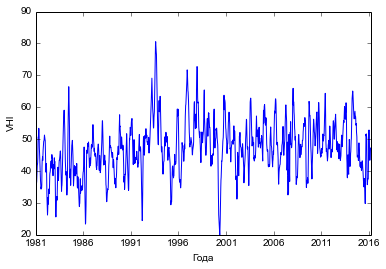

In [4]:
data_ok = adnl.checkData("clean") # Проверка наличия данных

def menuHandler(data = 0): # Обратботчик меню
    hdr.clear_output() # Убрать output выполненых команд
    df = adnl.makeDF(menu.selected_label)
    hdr.display(df)
    adnl.makeFig(df) # Создать график

if (data_ok):
    hdr.clear_output() # Убрать output выполненых команд
    menu = hdr.ipw.Select(options=adnl.region_names, description="Выберите область: ")
    menu.observe(menuHandler, 'value')
    hdr.display(menu) # Отобразить меню
    hdr.pd.options.display.max_rows = 5 # Максимальное количество отображаемых строк таблицы
    %matplotlib inline
    df = adnl.makeDF('Винница') # Создать датафрейм
    hdr.display(df)
    adnl.makeFig(df) # Создать график
else:
    print("Нет полных данных")

Изменение индексов областей:

In [5]:
adnl.changeIndex()
button = hdr.ipw.Button(description="Изменить индекс областей")
button.on_click(adnl.changeIndex)
hdr.display(button) # Отобразить кнопку

Минимальные и максимальные значения VHI для определенной области:

In [6]:
data_ok = adnl.checkData("clean") # Проверка наличия данных

def menuHandler2(data = 0): # Обработчик меню максимальных/минимальных значений областей
    hdr.clear_output() # Убрать output выполненых команд
    df = adnl.makeDF(menu2.selected_label)
    adnl.makeExtVHI(df) # Отобразить максимальное/минимальное значение

if (data_ok):
    hdr.clear_output() # Убрать output выполненых команд
    df = adnl.makeDF('Винница') # Создать датафрейм
    adnl.makeExtVHI(df) # Отобразить максимальное/минимальное значение
    
    menu2 = hdr.ipw.Select(options=adnl.region_names, description="Выберите область: ") # Меню
    hdr.display(menu2)
    menu2.observe(menuHandler2, 'value')
else:
    print("Нет полных данных")

Крым
Максимальное значение VHI:


,Год,Неделя,SMN,SMT,VCI,TCI,VHI,Процент площади где VHI < 15%,Процент площади где VHI < 35%
799,1997,34,0.3127,293.31,82.23,90.82,86.53,0,0.57


Минимальное значение VHI:


,Год,Неделя,SMN,SMT,VCI,TCI,VHI,Процент площади где VHI < 15%,Процент площади где VHI < 35%
1585,2012,40,0.1763,299.423,26.1,0.98,13.54,70.93,86.48


Процент площади определенной области где VHI < 15% либо VHI < 35%:

In [7]:
data_ok = adnl.checkData("clean") # Проверка наличия данных

def buttonHandler(button_value = 0): # Обработчик кнопки
    region = menu3.selected_label # Область выбрана
    percent = percent_text.value # Процент указан
    colomn = colomn_button.value
    hdr.clear_output() # Убрать output выполненых команд
    if (percent <= 100. and percent >= 0):
        adnl.areaShow(region, percent, colomn) # Показать датафрейм в отфильтрованном виде, создать файл с отфильтрованными данными
    else:
        print("Данные неправильные")

if (data_ok):
    hdr.clear_output() # Убрать output выполненых команд
    hdr.pd.options.display.max_rows = 20
    menu3 = hdr.ipw.Select(options=adnl.region_names, description="Выберите область: ") # Меню
    hdr.display(menu3)
    percent_text = hdr.ipw.FloatText(description="Процент: ") # Ввод процента
    percent_text.margin = "20"
    hdr.display(percent_text)
    colomn_button = hdr.ipw.ToggleButtons(description="Фильтровать: ") # Кнопка выбора фильтрации
    colomn_button.options = ["Процент площади где VHI < 15%", "Процент площади где VHI < 35%"]
    colomn_button.margin = "20"
    hdr.display(colomn_button)
    button = hdr.ipw.Button(description="Показать") # Кнопка для повторной "отчистки" данных
    button.on_click(buttonHandler) # Повторить "отчистку" "сырых" данных
    hdr.display(button) # Отобразить кнопку
else:
    print("Нет полных данных")

Днепропетровск


,Год,Неделя,SMN,SMT,VCI,TCI,VHI,Процент площади где VHI < 15%,Процент площади где VHI < 35%
250,1986,34,0.2123,302.171,26.01,8.98,17.49,45.71,92.19
251,1986,35,0.1918,301.362,22.30,6.19,14.24,57.37,96.27
252,1986,36,0.1662,299.151,17.70,8.90,13.30,61.37,96.31
253,1986,37,0.1436,296.352,14.58,15.47,15.02,55.34,94.09
254,1986,38,0.1236,292.970,12.49,28.52,20.50,36.07,87.76
404,1989,33,0.2159,302.063,24.17,15.05,19.60,40.89,87.41
405,1989,34,0.1995,300.945,20.34,19.46,19.90,40.65,86.44
713,1995,52,0.0040,257.585,0.42,39.96,20.19,37.39,89.27
714,1996,1,0.0012,256.050,0.24,38.77,19.50,41.31,88.26
964,2000,49,0.0189,263.589,13.17,28.93,21.05,36.49,85.46


### Вывод

Во время выполнения этой лабораторной работы, я познакомился с принципами получения и работы с данными, получил практические навыки отчистки и анализа данных. Также, узанл о существовании VHI индекса и ознакомился с его значением для Украины.